### ESTRUTURA ESCOLHIDA: 

### DICIONÁRIO DE DICIONÁRIOS

##### Teremos um dicionário com 2019-2024 como chaves 
##### Dentro dessas chaves teremos subchaves que serão os meses (1-12)
##### Dentro das subchaves dos meses teremos outras subchaves que são os códigos de cada país
##### Dentro dos países teremos, finalmente, os datasets com os dados de IMP/EXP em relação aos outros 142 países



In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [655]:
paises = pd.read_csv('paises.csv', sep=';')
display(paises.head())
display(len(paises))

,PAIS,COD
0,Afeganistão,AFG
1,África do Sul,ZAF
2,Albânia,ALB
3,Alemanha,DEU
4,Andorra,AND


250

In [656]:
#SEPARANDO OS 143 PRIMEIROS PAISES PARA TERMOS A QUANTIDADE DE PAISES CITADA NO EXERCICIO
paises = paises[:143]
len(paises)

143

In [657]:
dict_comex = {}

In [658]:
anos = [a for a in range(2019,2025)] #2019 - 2024
meses = [m for m in range(1,13)] #mes1 ate mes12

In [659]:
def criar_dados_comex():
    '''
    CRIANDO UM DICIONÁRIO QUE ARMAZENARÁ DIVERSOS DATASETS (1 PARA CADA PAIS)
    CADA DATASET TERÁ A COLUNA DE IMPORTAÇÃO E EXPORTAÇÃO DE CADA UM DOS OUTROS PAÍSES
    OU SEJA, O DATASET DO PAIS 'AFG' NAO TERÁ A COLUNA DE IMPORTACAO E EXPORTACAO PARA 'AFG'
    '''
    lista_paises = paises['COD'].to_list()
    lista_paises.remove(pais)

    colunas_imp = [f'{p}_IMP' for p in lista_paises]
    colunas_exp = [f'{p}_EXP' for p in lista_paises]

    colunas = sorted(colunas_imp+colunas_exp)
    valores = [np.random.randint(1000, 99001, 284)] # gerando valores

    return pd.DataFrame(valores, columns=colunas)

In [660]:
#CRIANDO A ESTRUTURA CITADA NA PRIMEIRA CÉLULA DO NOTEBOOK
for ano in anos:
    dict_comex[ano] = {}
    for mes in meses:
        dict_comex[ano][mes] = {}
        for pais in list(paises['COD']):
            dict_comex[ano][mes][pais] = criar_dados_comex()

In [661]:
#VISUALIZANDO OS DATASETS
print('EXPORTAÇÕES E IMPORTAÇÕES DA ANGOLA EM RELAÇÃO AOS OUTROS 142 PAÍSES EM 06/2022')
display(dict_comex[2022][6]['AGO'])
print('\n')
print('EXPORTAÇÕES E IMPORTAÇÕES DA BÉLGICA EM RELAÇÃO AOS OUTROS 142 PAÍSES EM 12/2020')
display(dict_comex[2020][12]['BEL'])

EXPORTAÇÕES E IMPORTAÇÕES DA ANGOLA EM RELAÇÃO AOS OUTROS 142 PAÍSES EM 06/2022


,ABW_EXP,ABW_IMP,AFG_EXP,AFG_IMP,AIA_EXP,AIA_IMP,ALA_EXP,ALA_IMP,ALB_EXP,ALB_IMP,...,VGB_EXP,VGB_IMP,VIR_EXP,VIR_IMP,XXK_EXP,XXK_IMP,YEM_EXP,YEM_IMP,ZAF_EXP,ZAF_IMP
0,34159,12248,51756,36014,34535,26729,22900,9443,42936,37440,...,63347,10549,18556,7308,58696,87069,40064,92410,32441,87522




EXPORTAÇÕES E IMPORTAÇÕES DA BÉLGICA EM RELAÇÃO AOS OUTROS 142 PAÍSES EM 12/2020


,ABW_EXP,ABW_IMP,AFG_EXP,AFG_IMP,AGO_EXP,AGO_IMP,AIA_EXP,AIA_IMP,ALA_EXP,ALA_IMP,...,VGB_EXP,VGB_IMP,VIR_EXP,VIR_IMP,XXK_EXP,XXK_IMP,YEM_EXP,YEM_IMP,ZAF_EXP,ZAF_IMP
0,89372,39079,33200,93111,89118,68481,60595,90976,29609,41107,...,94871,27771,10989,80043,22049,72378,16169,49796,36509,21406


## ex 1.4
#### Gerando dados de 2025 somente até o mês5 para criar o report_final de um ano incompleto

In [662]:
def add_dados(ano, meses):
    '''
    Adiciona dados ao dicionário. 
    Insira, no mínimo, 3 meses para adicionar dados.
    '''
    
    for a in [ano]:
        dict_comex[a] = {}
        for m in meses:
            dict_comex[a][m] = {}
            for pais in list(paises['COD']):
                dict_comex[a][m][pais] = criar_dados_comex()

In [663]:
#Adicionando os meses 1,2,3 e 4 de 2025
add_dados(2025,[1,2,3])

In [667]:
def final_report_ano(pais_origem: str, pais_destino: str, ano: int):
    '''
    Retorna o report final do ano. Caso o ano não esteja completo, retorna até o último mês disponível.
    '''

    total_exp = []
    total_imp = []

    for m in range(1, len(dict_comex[ano])+1): #percorrendo sobre a quantidade de meses no ano mencionado
        soma_exp = int(dict_comex[ano][m][pais_origem].filter(like=pais_destino).iloc[0][0])
        total_exp.append(soma_exp)

        soma_imp = int(dict_comex[ano][m][pais_origem].filter(like=pais_destino).iloc[0][1])
        total_imp.append(soma_imp)

    plt.plot(range(1, len(dict_comex[ano])+1), total_exp)
    plt.plot(range(1, len(dict_comex[ano])+1), total_imp)
    plt.legend(['Total Exportações', 'Total Importações'])
    plt.title(f'Exportações/Importações entre {pais_origem} e {pais_destino}')
    plt.xlabel('Mês')
    plt.xticks(range(1, len(dict_comex[ano])+1))
    plt.show()

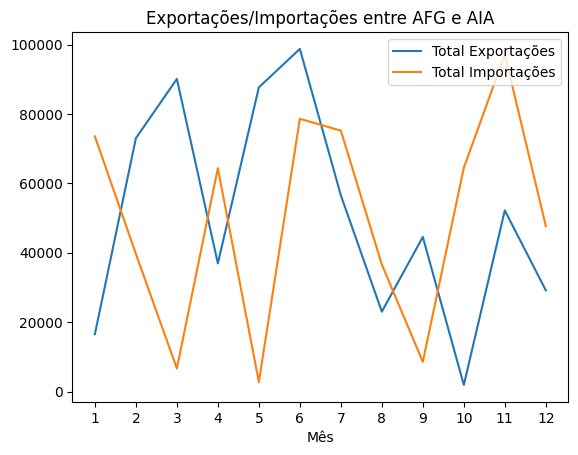

In [668]:
final_report_ano('AFG', 'AIA', 2024)

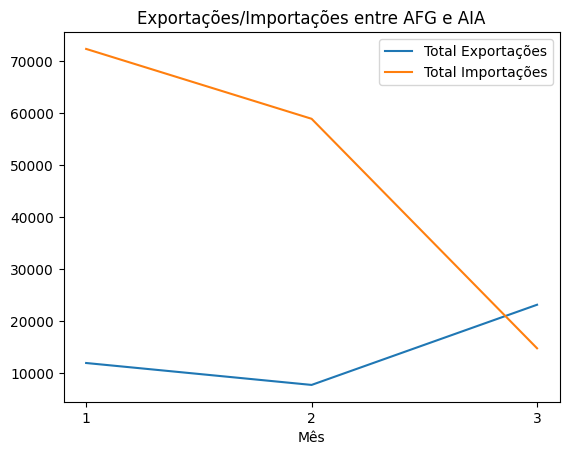

In [671]:
final_report_ano('AFG', 'AIA', 2025)